In [1]:
import scipy.stats
import numpy as np ; import numpy.ma as ma
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from netCDF4 import Dataset
import netCDF4
import time
import pandas as pd
import numpy.ma as ma
import matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import sys, glob, os, re


/usr/lib/python3/dist-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


/usr/lib/python3/dist-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/usr/lib/python3/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


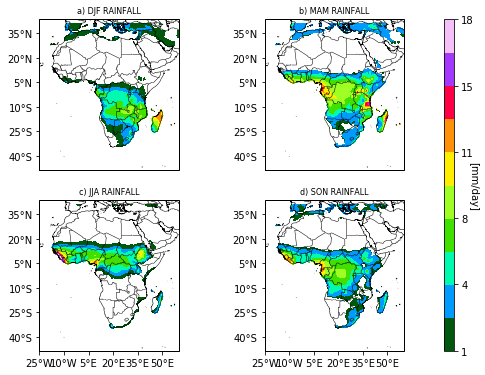

In [10]:

#----------function allowing to save high-quality figures in different formats---------- 
def save(path, ext='png', close=True, verbose=True):
    """Save a figure from pyplot.
    Parameters
    ----------
    path : string
    The path (and filename, without the extension) to save the
    figure to.
    ext : string (default='png')
    The file extension. This must be supported by the active
    matplotlib backend (see matplotlib.backends module).  Most
    backends support 'png', 'pdf', 'ps', 'eps', and 'svg'.
    close : boolean (default=True)
    Whether to close the figure after saving.  If you want to save
    the figure multiple times (e.g., to multiple formats), you
    should NOT close it in between saves or you will have to
    re-plot it.
    verbose : boolean (default=True)
    whether to print information about when and where the image
    has been saved.
    """
    # Extract the directory and filename from the given path
    directory = os.path.split(path)[0]
    filename = "%s.%s" % (os.path.split(path)[1], ext)
    if directory == '':
       directory = '.'
    #If the directory does not exist, create it
    if not os.path.exists(directory):
        os.makedirs(directory)
    # The final path to save to
    savepath = os.path.join(directory, filename)
    if verbose:
        print("Saving figure to '%s'..." % savepath),
    # Actually save the figure
    plt.savefig(savepath)
    # Close it
    if close:
        plt.close()
    if verbose:
        print("Done")

#----------directory where the data are stored------------------------------------------- 
path = '/home/yusufbrima/Downloads/climate'

##########################################################################################

#--------Here let's read the different netDF files corresponding to four seasons--------- 

#--------DJF season--------- 
ncfile0 = Dataset(path + '/afr_cru_djf.nc', 'r', format='NETCDF4')
pr_djf = ncfile0.variables['pre'][:,:,:] # MULTIPLY BY 86400 TO CONVERT TO MM/DAY
lat = ncfile0.variables['lat'][:]
lon = ncfile0.variables['lon'][:]
time = ncfile0.variables['time']
ncfile0.close()

#--------MAM season--------- 
ncfile1 = Dataset(path + '/afr_cru_mam.nc', 'r', format='NETCDF4')
pr_mam = ncfile1.variables['pre'][:,:,:] # MULTIPLY BY 86400 TO CONVERT TO MM/DAY
lat = ncfile1.variables['lat'][:]
lon = ncfile1.variables['lon'][:]
#time = ncfile1.variables['time']
ncfile1.close()

#--------JJA season--------- 
ncfile2 = Dataset(path + '/afr_cru_jja.nc', 'r', format='NETCDF4')
pr_jja = ncfile2.variables['pre'][:,:,:] # MULTIPLY BY 86400 TO CONVERT TO MM/DAY
lat = ncfile2.variables['lat'][:]
lon = ncfile2.variables['lon'][:]
#time = ncfile2.variables['time']
ncfile2.close()

#--------SON season--------- 
ncfile3 = Dataset(path + '/afr_cru_son.nc', 'r', format='NETCDF4')
pr_son = ncfile3.variables['pre'][:,:,:] # MULTIPLY BY 86400 TO CONVERT TO MM/DAY
lat = ncfile3.variables['lat'][:]
lon = ncfile3.variables['lon'][:]
#time = ncfile3.variables['time']
ncfile3.close()


##############################compute mean for all seasons####################################
pr_djf = np.mean(pr_djf,axis=0)  
pr_mam = np.mean(pr_mam,axis=0)  
pr_jja = np.mean(pr_jja,axis=0)  
pr_son = np.mean(pr_son,axis=0)  

#-------mask precipitation below 1 mm/day
pr_djf = ma.masked_where(pr_djf <= 1., pr_djf)
pr_mam = ma.masked_where(pr_mam <= 1., pr_mam)
pr_jja = ma.masked_where(pr_jja <= 1., pr_jja)
pr_son = ma.masked_where(pr_son <= 1., pr_son)

#=========================Map resources==============================
fig = plt.figure(figsize=(7.40,6.10))
kwargs = {'format': '%.0f'}  # to fix decimals at X numbers after - put **kwargs in plt.cbar 
[lon2d, lat2d] = np.meshgrid(lon, lat)
cmap = plt.cm.gist_ncar

prj = ccrs.PlateCarree(central_longitude=0.0)
# plt.figure(figsize=(12,8))
axa = plt.subplot(221, projection=prj)
#axa.add_feature(cfeat.COASTLINE ,edgecolor = 'k')
axa.add_feature(cfeat.BORDERS.with_scale('10m'),linewidth=0.5)
axa.coastlines(resolution='10m',linewidth=0.5);
#axa.add_feature(cfeat.BORDERS, linestyle='-', alpha=.5)
#axa.add_feature(cfeat.OCEAN,edgecolor='k',facecolor='w') # to mask ocean
cs1 = plt.contourf(lon2d,lat2d,pr_djf,levels = np.linspace(1., 18.,11),cmap=cmap)
axa.set_extent([-25 ,60, -40, 35])
#axa.set_xticks(range(-25,60,15), crs=prj)
axa.set_yticks(range(-40,40,15), crs=prj)
#axa.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
axa.yaxis.set_major_formatter(LATITUDE_FORMATTER)
plt.title('a) DJF RAINFALL', fontsize=8)
plt.ylabel('')
#cb0 = plt.colorbar ( cs1, ax = axa,orientation ='horizontal' )

axb = plt.subplot(222, projection=prj)
#axb.add_feature(cfeat.COASTLINE ,edgecolor = 'k')
axb.add_feature(cfeat.BORDERS.with_scale('10m'),linewidth=0.5)
axb.coastlines(resolution='10m',linewidth=0.5);
#axb.add_feature(cfeat.BORDERS, linestyle='-', alpha=.5)
#axb.add_feature(cfeat.OCEAN,edgecolor='k',facecolor='w') # to mask ocean
cs1 = plt.contourf(lon2d,lat2d,pr_mam,levels = np.linspace(0., 12.,11),cmap=cmap)
axb.set_extent([-25 ,60, -40, 35])
#axb.set_xticks(range(-25,60,15), crs=prj)
axb.set_yticks(range(-40,40,15), crs=prj)
axb.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
axb.yaxis.set_major_formatter(LATITUDE_FORMATTER)
plt.title('b) MAM RAINFALL', fontsize=8)
plt.ylabel('')
#cb0 = plt.colorbar ( cs1, ax = axb,orientation ='horizontal' )

axc = plt.subplot(223, projection=prj)
#axc.add_feature(cfeat.COASTLINE ,edgecolor = 'k')
axc.add_feature(cfeat.BORDERS.with_scale('10m'),linewidth=0.5)
axc.coastlines(resolution='10m',linewidth=0.5);
#axc.add_feature(cfeat.BORDERS, linestyle='-', alpha=.5)
#axc.add_feature(cfeat.OCEAN,edgecolor='k',facecolor='w') # to mask ocean
csc = plt.contourf(lon2d,lat2d,pr_jja,levels = np.linspace(1.,18.,11),cmap=cmap)
axc.set_extent([-25 ,60, -40, 35])
axc.set_xticks(range(-25,60,15), crs=prj)
axc.set_yticks(range(-40,40,15), crs=prj)
axc.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
axc.yaxis.set_major_formatter(LATITUDE_FORMATTER)
plt.title('c) JJA RAINFALL', fontsize=8)
plt.ylabel('')
#cb0 = plt.colorbar ( csc, ax = axc,orientation ='horizontal' )

axd = plt.subplot(224, projection=prj)
#axd.add_feature(cfeat.COASTLINE ,edgecolor = 'k')
axd.add_feature(cfeat.BORDERS.with_scale('10m'),linewidth=0.5)
axd.coastlines(resolution='10m',linewidth=0.5);
#axd.add_feature(cfeat.BORDERS, linestyle='-', alpha=.5)
#axd.add_feature(cfeat.OCEAN,edgecolor='k',facecolor='w') # to mask ocean
cs1 = plt.contourf(lon2d,lat2d,pr_son,levels = np.linspace(0., 16.,11),cmap=cmap)
axd.set_extent([-25 ,60, -40, 35])
axd.set_xticks(range(-25,60,15), crs=prj)
axd.set_yticks(range(-40,40,15), crs=prj)
axd.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
axd.yaxis.set_major_formatter(LATITUDE_FORMATTER)
plt.title('d) SON RAINFALL', fontsize=8)
plt.ylabel('')
#cb0 = plt.colorbar ( cs1, ax = axd,orientation ='horizontal' )


axtop = axa.get_position()
axbot = axd.get_position()

cbar_ax = fig.add_axes([axbot.x1+0.075, axbot.y0, 0.020, axtop.y1-axbot.y0])
cbar = plt.colorbar(csc, cax=cbar_ax, orientation='vertical',**kwargs)
cbar.set_label('[mm/day]',rotation=270) 
plt.tight_layout() # Adjust the padding between and around subplots.

plt.show()

# save(f'{path}/figures/Rainfall_all_seasons', ext='pdf', close=True, verbose=True)  # save high quality figures
